<a href="https://colab.research.google.com/github/Folasewa/EmoAI_facerecognition/blob/main/Attention_Final_Year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics==8.0.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.1 MB/s eta 0:00:00


In [3]:
import os
from ultralytics import YOLO


In [4]:
!pip install roboflow --quiet
from roboflow import Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00


In [5]:
#%cd /content/drive/MyDrive/New_Yolov8

rf = Roboflow(api_key="A1flBbltSrzc5182GC1K")
project = rf.workspace("gleb").project("driver-drowsiness-detector---hand-gestures--to-train-yolov5")
dataset = project.version(9).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Driver-Drowsiness-Detector-+-Hand-Gestures-[to-train-YOLOv5]-9 in yolov8:: 100%|██████████| 9622/9622 [00:02<00:00, 4041.66it/s]


In [6]:
%cd '/content/datasets'

!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/data.yaml' epochs=25 imgsz=640 plots=True

[Errno 2] No such file or directory: '/content/datasets'
/content
100% 21.5M/21.5M [00:00<00:00, 335MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

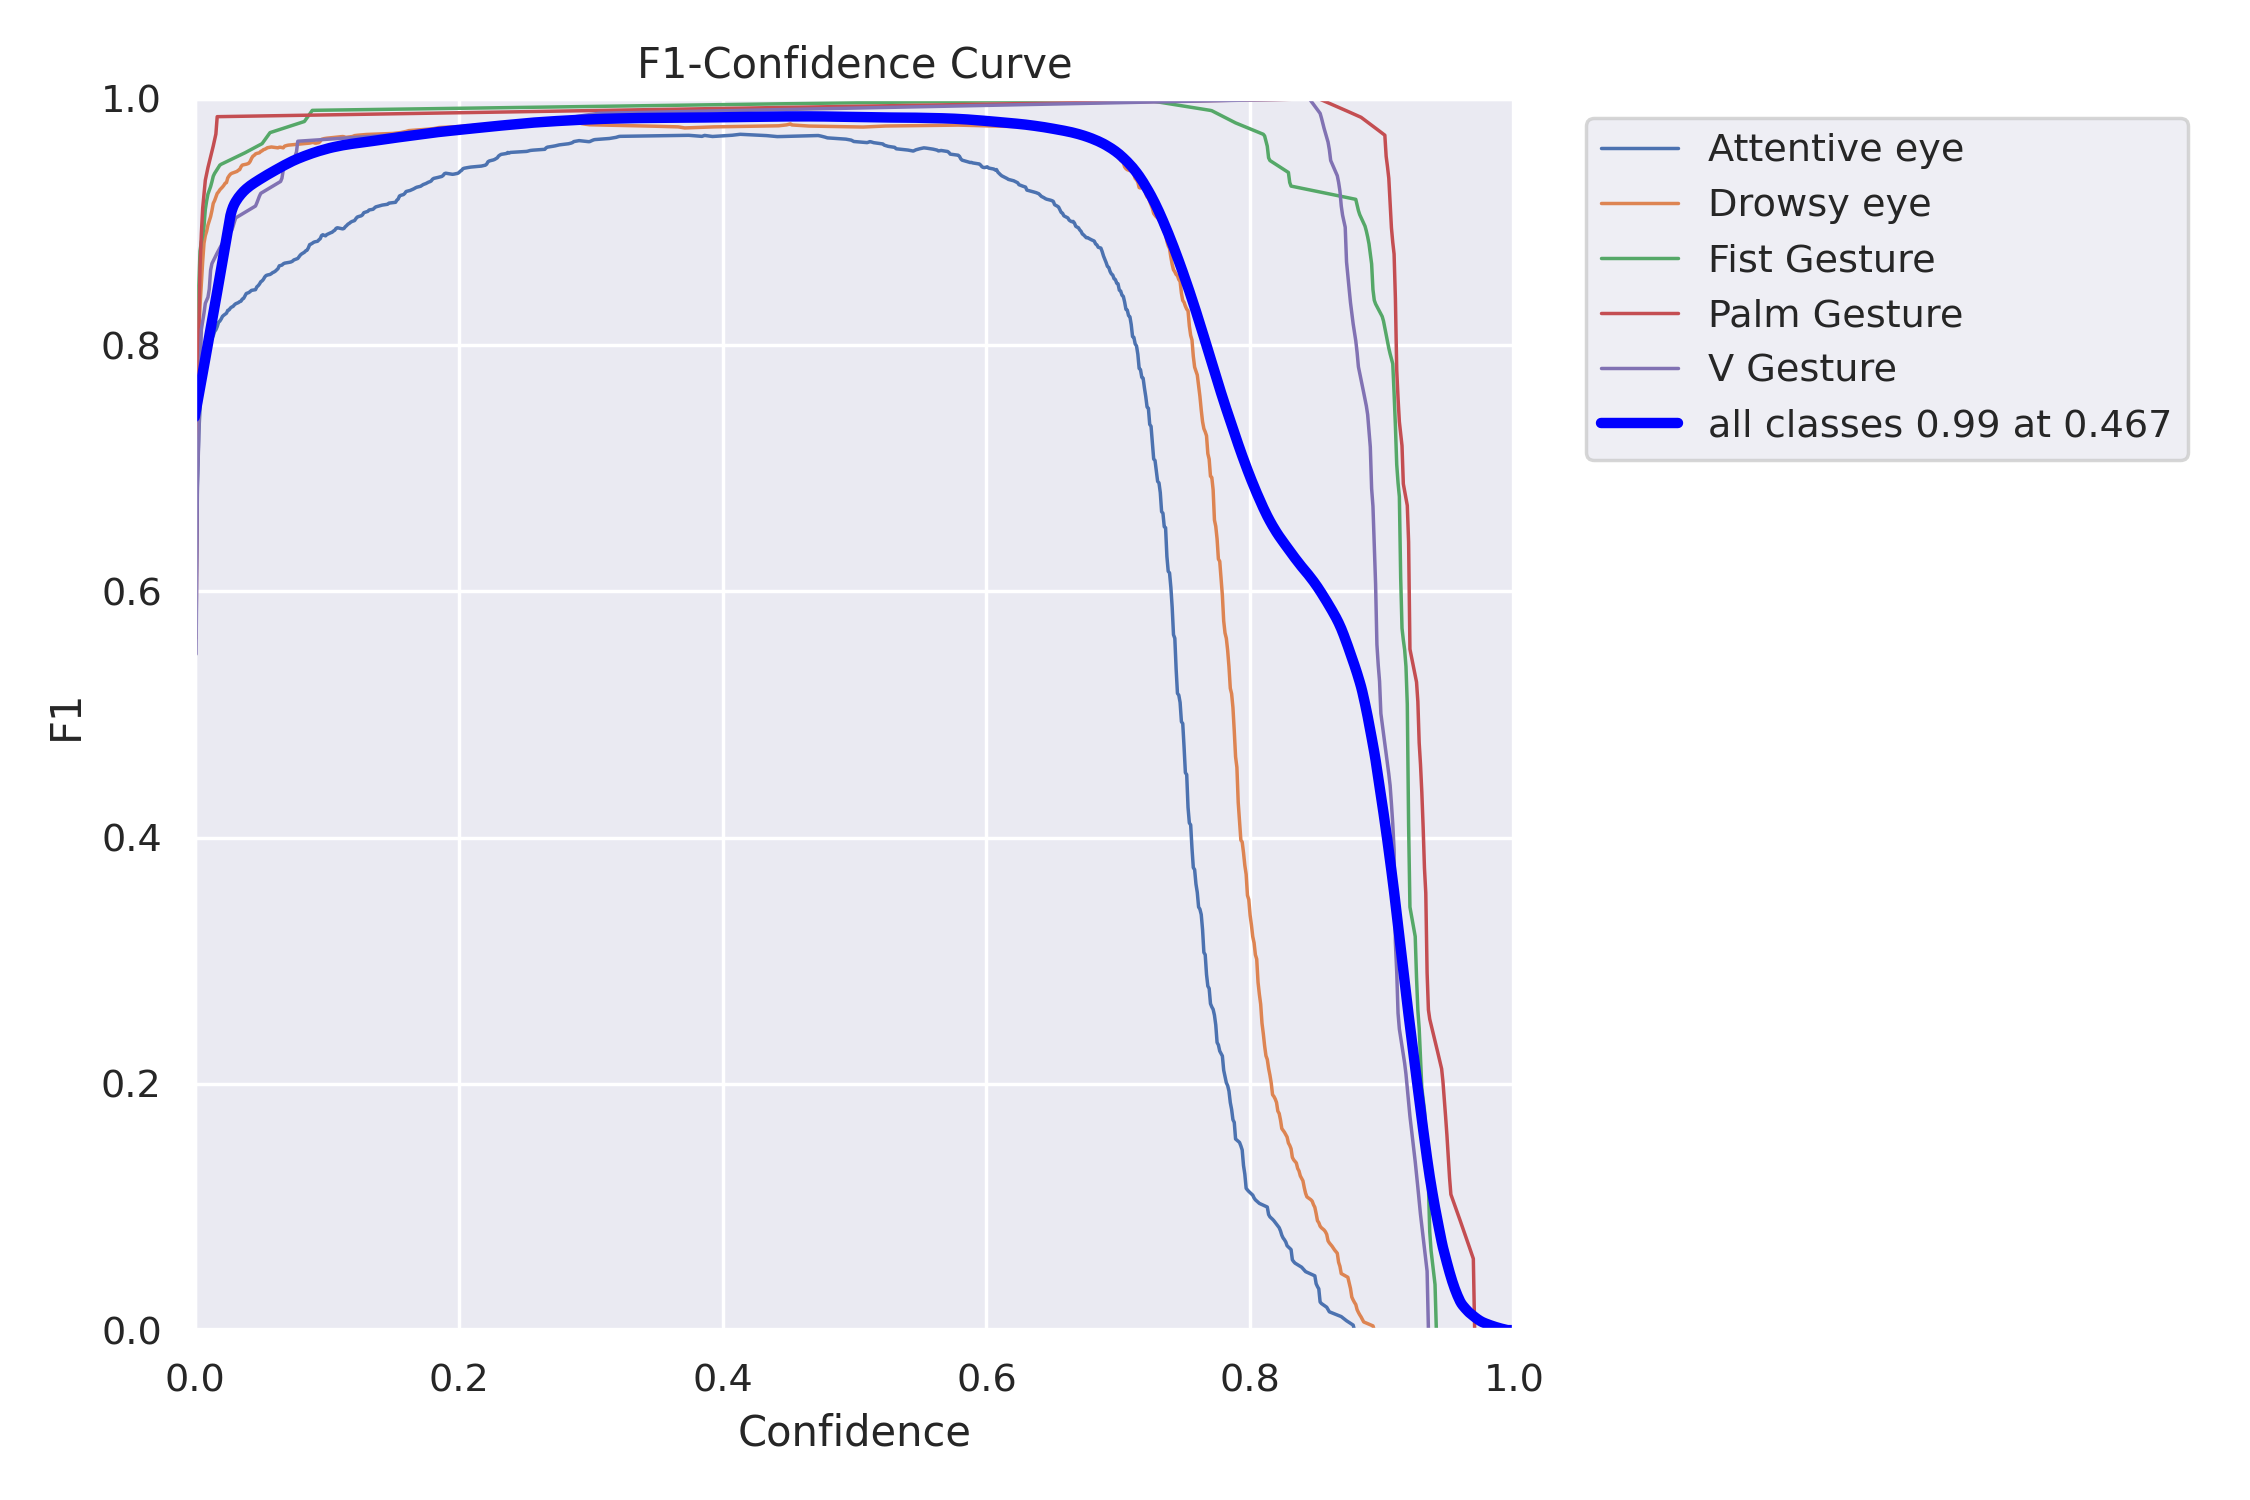

In [ ]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train4/F1_curve.png", width=400, height=400))

In [7]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train4/PR_curve.png", width=400, height=400))

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

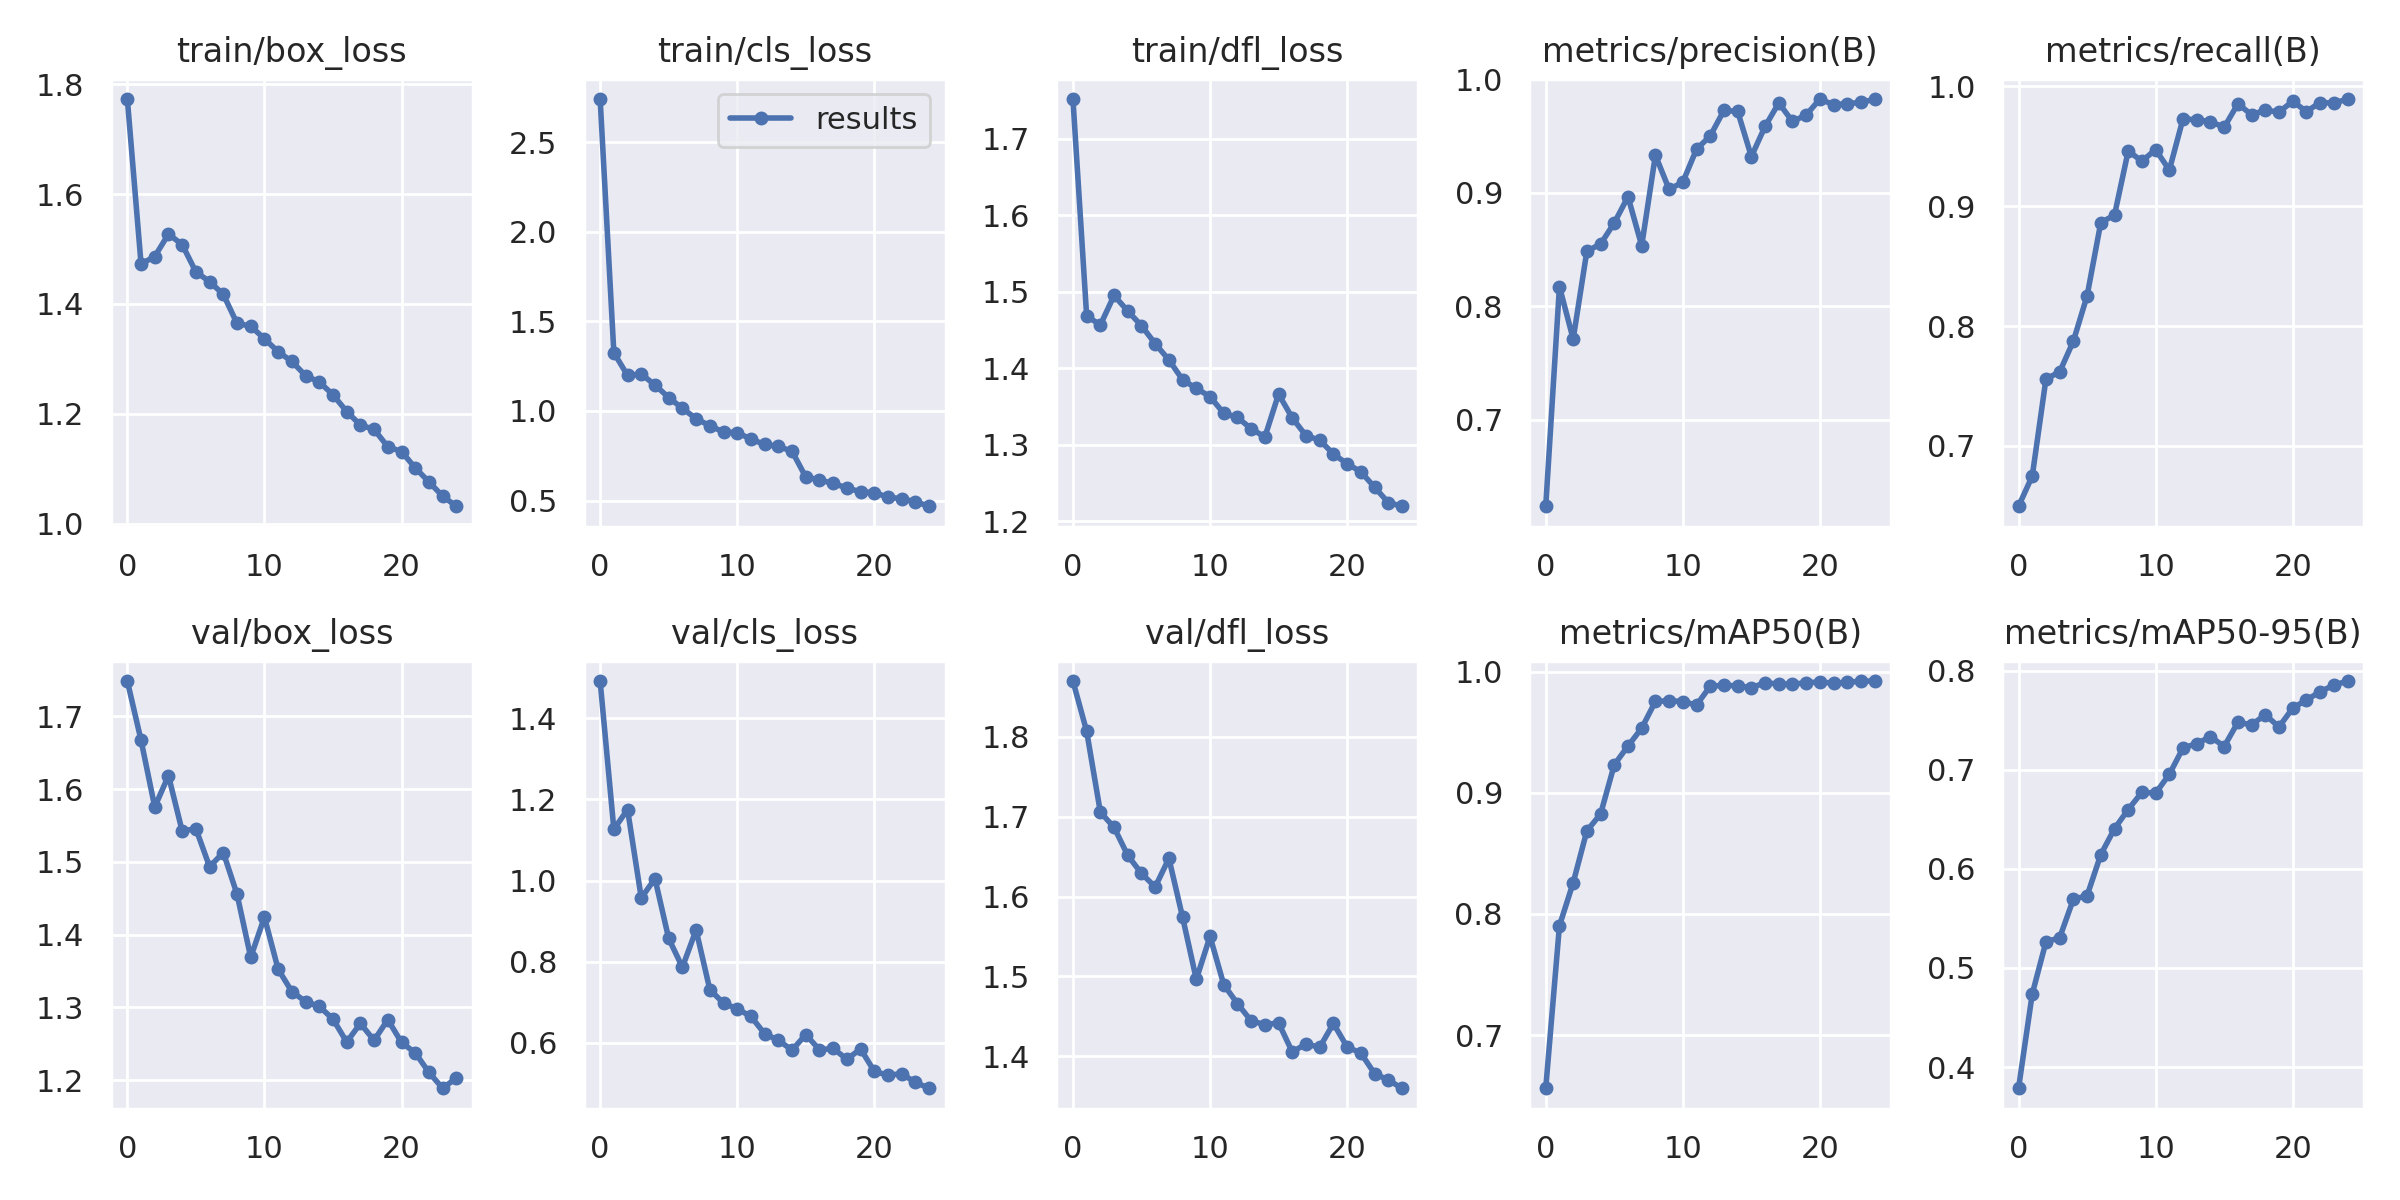

In [ ]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train4/results.png", width=600))

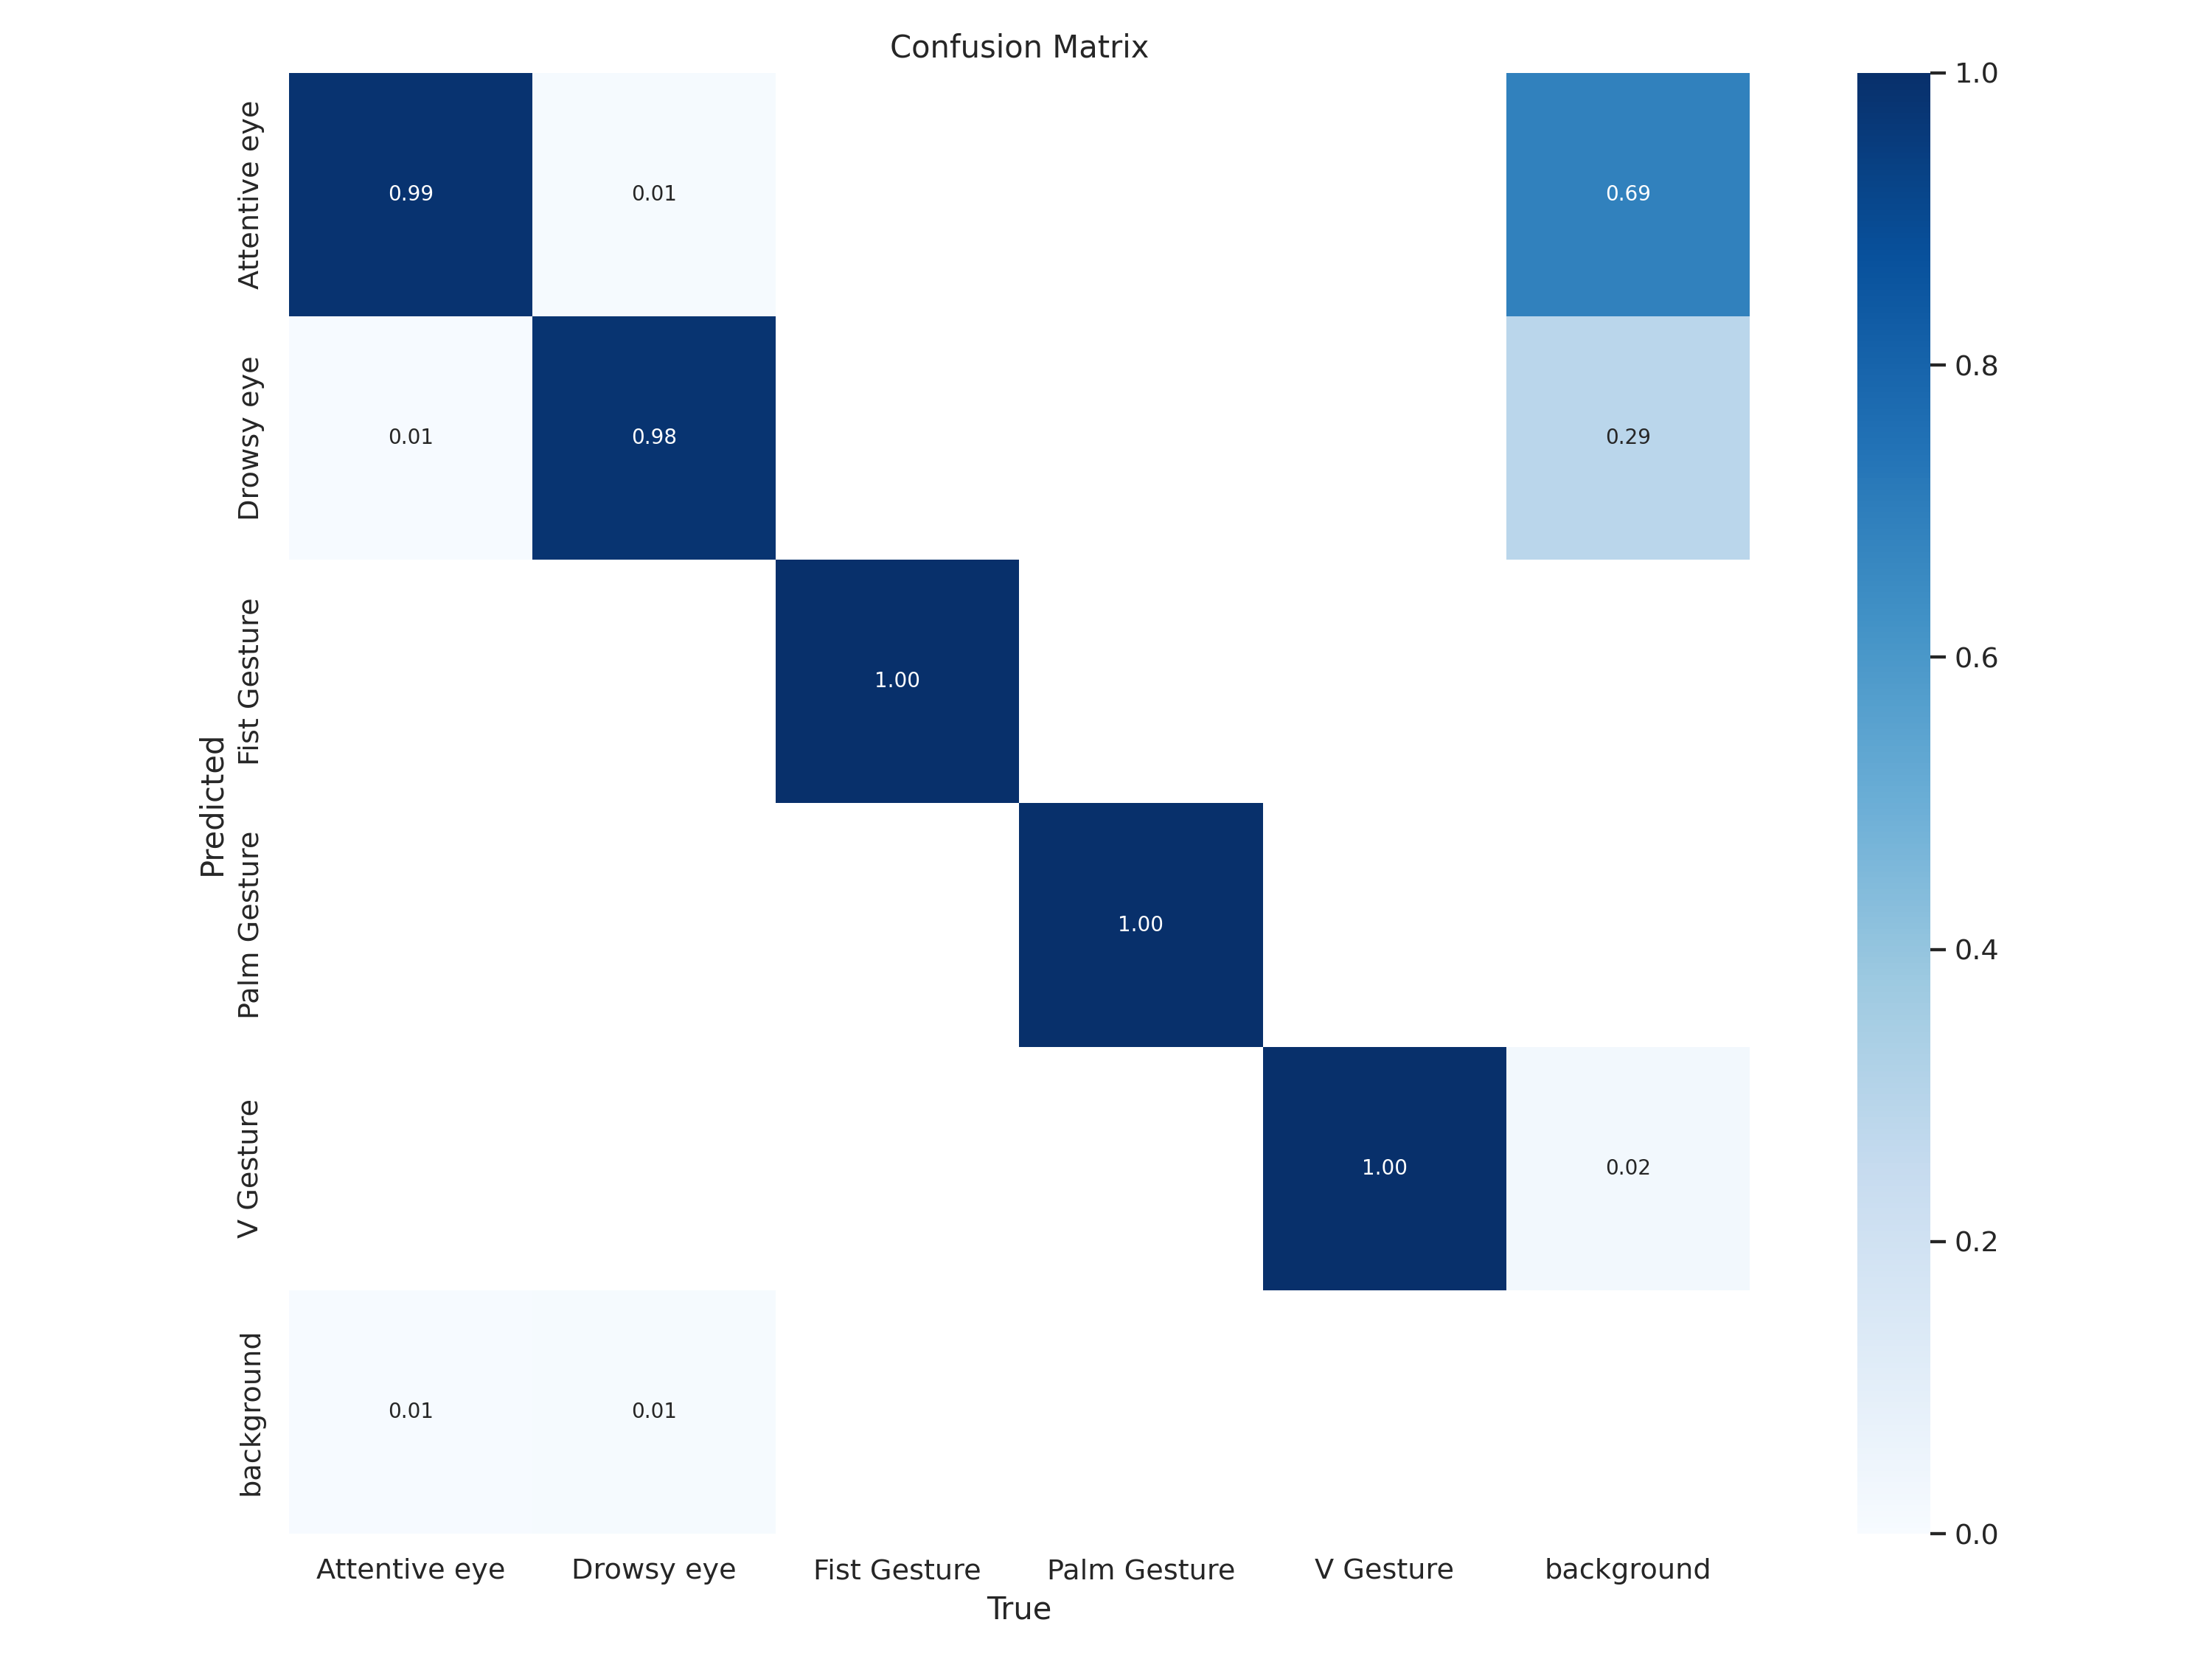

In [ ]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train4/confusion_matrix.png", width=600))

In [ ]:
%cd '/content/datasets'
!yolo task=detect mode=val model='/content/datasets/runs/detect/train4/weights/best.pt' data='/content/datasets/data.yaml'

/content/Driver-Drowsiness-Detector-+-Hand-Gestures-[to-train-YOLOv5]-9
2023-05-17 20:52:07.460423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 20:52:08.290632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 905 images, 12 backgrounds, 0 corrupt: 100% 905/905 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 57/57 [00:14<00:00,  4.02it/s]
                   all        905       1257      0.982      0.989      0.9

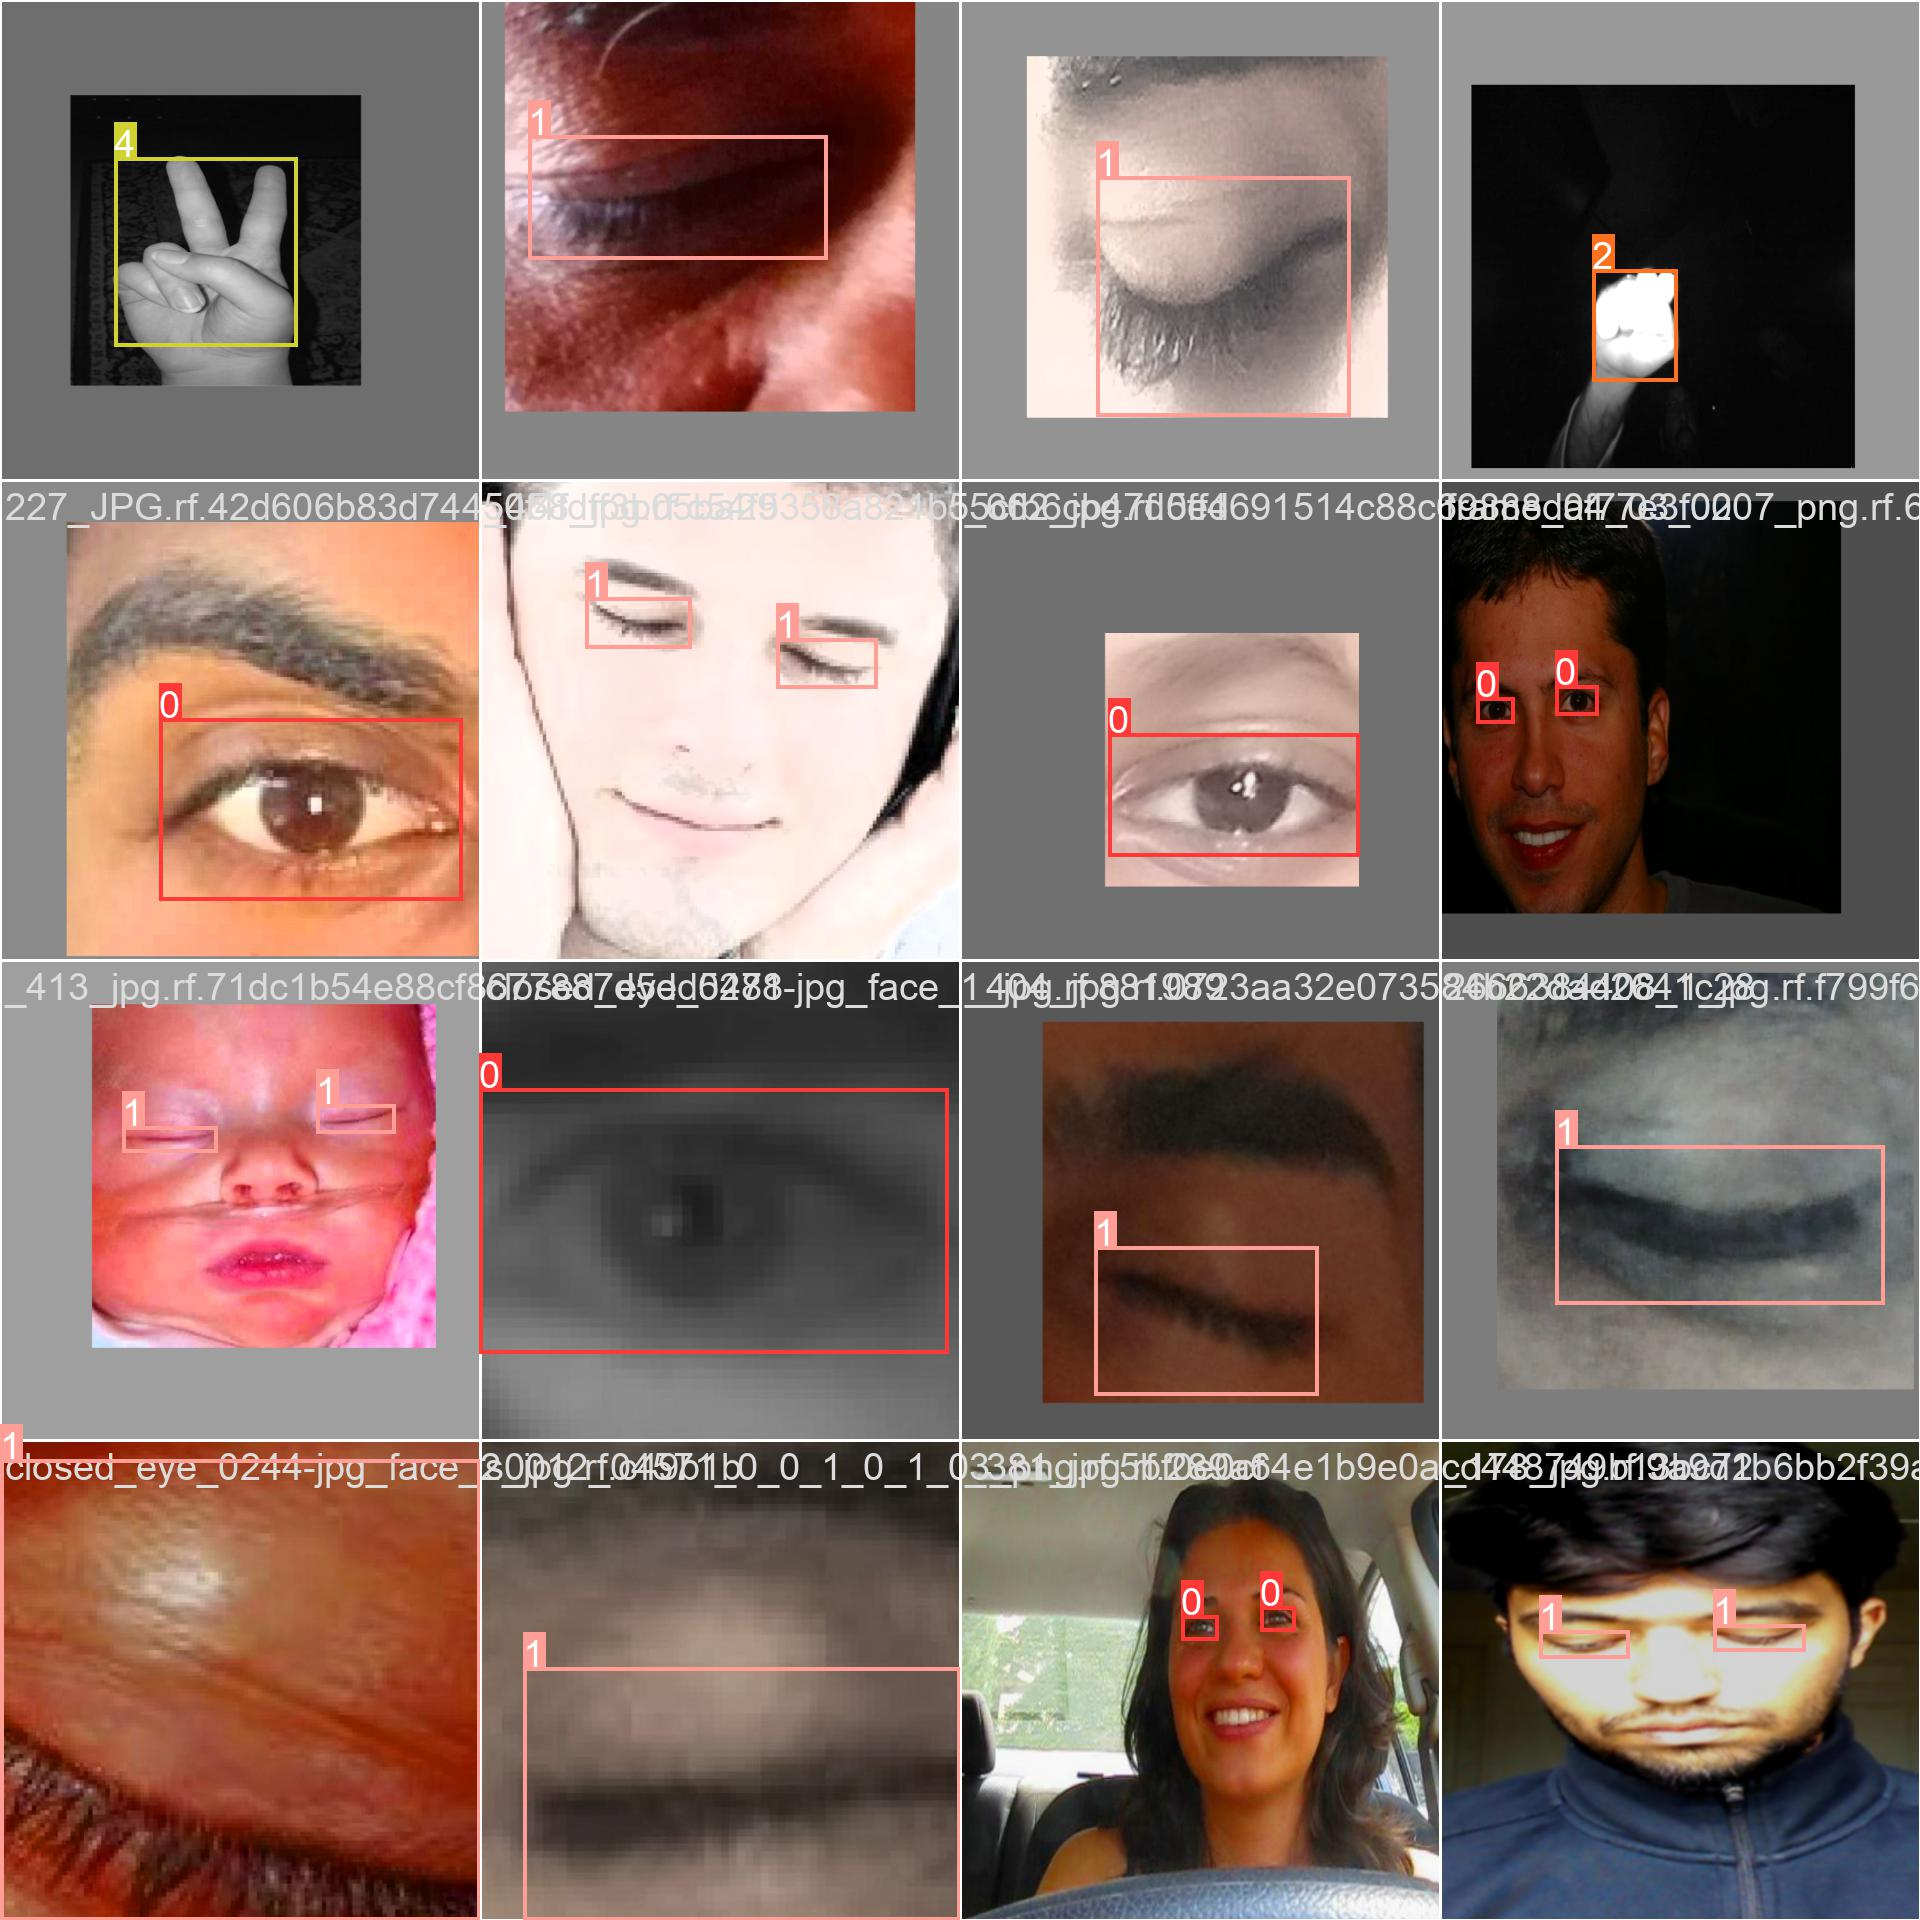

In [ ]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/train4/train_batch3285.jpg", width=600))

In [ ]:
%cd '/content/datasets'
!yolo task=detect mode=predict model='/content/datasets/runs/detect/train4/weights/best.pt' conf=0.25 source='/content/datasets/test/images' save=True

/content/Driver-Drowsiness-Detector-+-Hand-Gestures-[to-train-YOLOv5]-9
2023-05-17 20:54:04.059590: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 20:54:04.903706: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/399 /content/datasets/test/images/000002_jpg.rf.d61f74cfaa9c653b1f28a610d1414b0e.jpg: 640x640 1 Attentive eye, 16.2ms
image 2/399 /content/datasets/test/images/000004_jpg.rf.17ab9695485bc8d000bb0adadd73d145.jpg: 640x640 1 Attentive eye, 16.3ms
image 3/399 /content/datasets/test/images/000008_jpg.rf.c7fa6d9f7f39b52a

In [ ]:
!yolo task=detect mode=predict model='/content/datasets/runs/detect/train4/weights/best.pt' conf=0.25 source='/content/datasets/test/att.jpg' save=True

2023-05-17 21:13:52.625449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 21:13:53.506371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/datasets/test/att.jpg: 640x448 2 Attentive eyes, 65.8ms
Speed: 0.6ms pre-process, 65.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


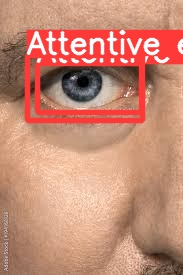

In [ ]:
from IPython.display import Image
display(Image("/content/datasets/runs/detect/predict4/att.jpg", width=600))

In [ ]:
project.version(4).deploy(model_type="yolov8", model_path='/content/Fruit-Detection-4/runs/detect/train2')

Dependency ultralytics<=8.0.20 is required but found version=8.0.53, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/detection-g824o/fruit-detection-hgqya/deploy/4
Share your model with the world at: https://universe.roboflow.com/detection-g824o/fruit-detection-hgqya/model/4
